Topic:        Challenge Set 8

Subject:      Classification Errors

Date:         02/05/2018

Name:         Browning Gentry

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
columns = ['party', 
            'handicapped-infants', 
            'water-project-cost-sharing', 
            'adoption-of-the-budget-resolution',
            'physician-fee-freeze',
            'el-salvador-aid',
            'religious-groups-in-schools',
            'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras',
            'mx-missile',
            'immigration',
            'synfuels-corporation-cutback',
            'education-spending',
            'superfund-right-to-sue',
            'crime',
            'duty-free-exports',
            'export-administration-act-south-africa']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
                header=None,
                names = columns)

In [20]:
df = df.replace('y',1)
df = df.replace('n',0)
df = df.replace('democrat',1)
df = df.replace('republican',0)

total = len(df)

for col in df.columns:
    per_yes = df[col].value_counts()[0]/total
    if per_yes > .5:
        df[col] = df[col].replace('?',1)
    else:
        df[col] = df[col].replace('?',0)

In [21]:
from sklearn.cross_validation import train_test_split
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)

# Challenge 1

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

def print_stats(model, y_test, X_test, mdlname):
    acc = accuracy_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))
    pre = precision_score(y_test, model.predict(X_test))
    rec = recall_score(y_test, model.predict(X_test))
    
    print(mdlname + ' accuracy score: ' + str(acc))
    print(mdlname + ' f1 score: ' + str(f1))
    print(mdlname + ' precision score: ' + str(pre))
    print(mdlname + ' recall score: ' + str(rec))
    print()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
print_stats(knn, y_test, X_test, 'KNN')

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print_stats(lr, y_test, X_test, 'LogisticRegression')

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print_stats(nb, y_test, X_test, 'GaussianNB')

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print_stats(svc, y_test, X_test, 'SVC')

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print_stats(dtc, y_test, X_test, 'DecisionTreeClassifier')

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print_stats(rf, y_test, X_test, 'RandomForestClassifier')

KNN accuracy score: 0.923664122137
KNN f1 score: 0.934210526316
KNN precision score: 0.946666666667
KNN recall score: 0.922077922078

LogisticRegression accuracy score: 0.946564885496
LogisticRegression f1 score: 0.954838709677
LogisticRegression precision score: 0.948717948718
LogisticRegression recall score: 0.961038961039

GaussianNB accuracy score: 0.93893129771
GaussianNB f1 score: 0.95
GaussianNB precision score: 0.915662650602
GaussianNB recall score: 0.987012987013

SVC accuracy score: 0.946564885496
SVC f1 score: 0.954838709677
SVC precision score: 0.948717948718
SVC recall score: 0.961038961039

DecisionTreeClassifier accuracy score: 0.93893129771
DecisionTreeClassifier f1 score: 0.95
DecisionTreeClassifier precision score: 0.915662650602
DecisionTreeClassifier recall score: 0.987012987013

RandomForestClassifier accuracy score: 0.969465648855
RandomForestClassifier f1 score: 0.974358974359
RandomForestClassifier precision score: 0.962025316456
RandomForestClassifier recall s

# Challenge 2

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def print_AUC(model, y_test, X_test, mdlname):
    fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    plt.title(mdlname + ' ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


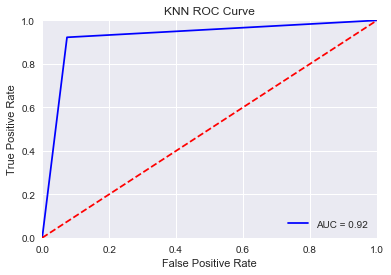

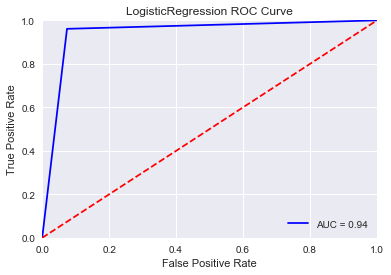

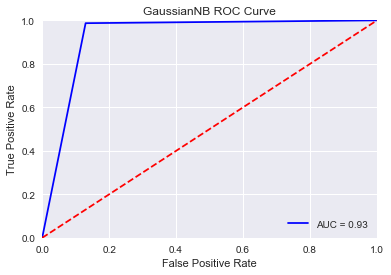

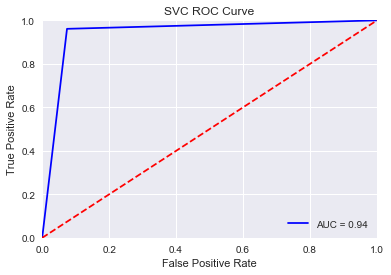

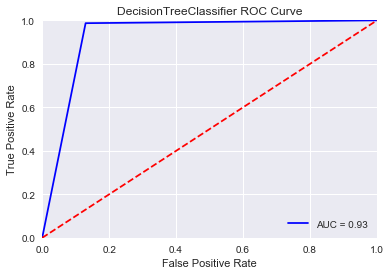

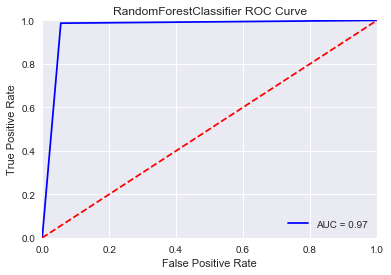

In [56]:
print_AUC(knn, y_test, X_test, 'KNN')
print_AUC(lr, y_test, X_test, 'LogisticRegression')
print_AUC(nb, y_test, X_test, 'GaussianNB')
print_AUC(svc, y_test, X_test, 'SVC')
print_AUC(dtc, y_test, X_test, 'DecisionTreeClassifier')
print_AUC(rf, y_test, X_test, 'RandomForestClassifier')


# Challenge 3

In [62]:
from sklearn.cross_validation import cross_val_score

def cv_stats(model, y, X, mdlname):
    acc = knn_cv = np.mean(cross_val_score(model, X, y, scoring="accuracy"))
    f1 = np.mean(cross_val_score(model, X, y, scoring="f1"))
    pre = np.mean(cross_val_score(model, X, y, scoring="precision"))
    rec = np.mean(cross_val_score(model, X, y, scoring="recall"))
    
    print(mdlname + ' cv accuracy score: ' + str(acc))
    print(mdlname + ' cv f1 score: ' + str(f1))
    print(mdlname + ' cv precision score: ' + str(pre))
    print(mdlname + ' cv recall score: ' + str(rec))
    print()

In [63]:
cv_stats(knn, y, X, 'KNN')
cv_stats(lr, y, X, 'LogisticRegression')
cv_stats(nb, y, X, 'GaussianNB')
cv_stats(svc, y, X, 'SVC')
cv_stats(dtc, y, X, 'DecisionTreeClassifier')
cv_stats(rf, y, X, 'RandomForestClassifier')

KNN cv accuracy score: 0.92183908046
KNN cv f1 score: 0.934409070182
KNN cv precision score: 0.964679492769
KNN cv recall score: 0.906367041199

LogisticRegression cv accuracy score: 0.96091954023
LogisticRegression cv f1 score: 0.96774633695
LogisticRegression cv precision score: 0.977047908029
LogisticRegression cv recall score: 0.958801498127

GaussianNB cv accuracy score: 0.942528735632
GaussianNB cv f1 score: 0.952612476139
GaussianNB cv precision score: 0.961836075426
GaussianNB cv recall score: 0.943820224719

SVC cv accuracy score: 0.95632183908
SVC cv f1 score: 0.963309126771
SVC cv precision score: 0.988505747126
SVC cv recall score: 0.940074906367

DecisionTreeClassifier cv accuracy score: 0.940229885057
DecisionTreeClassifier cv f1 score: 0.960313488995
DecisionTreeClassifier cv precision score: 0.973268170884
DecisionTreeClassifier cv recall score: 0.932584269663

RandomForestClassifier cv accuracy score: 0.954022988506
RandomForestClassifier cv f1 score: 0.956050866649
Ra

# Challenge 4

In [66]:
df = pd.read_csv('2013_movies.csv')
del df['Title']
from datetime import datetime
df['ReleaseDate'] = df.apply(lambda x: (datetime.now() 
                                        - datetime.strptime(x['ReleaseDate'],'%Y-%m-%d %H:%M:%S'))
                                         .total_seconds(),
                             axis=1)
df = pd.get_dummies(df, columns = ['Director'], drop_first=True)
df.dropna(inplace=True)

mid = df['Rating']
df.drop(labels=['Rating'], axis=1,inplace = True)
df.insert(0, 'Rating', mid)

In [ ]:
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

def pred_pg13(vals):
    output = []
    for i in range(len(vals)):
        output.append('PG-13')
    return output
dumb_preds = pred_pg13(X_test)

In [74]:
def print_stats2(y_test, preds, mdlname):
    pre = precision_score(y_test, preds, average='macro')
    rec = recall_score(y_test, preds, average='macro')
    
    print(mdlname + ' precision score: ' + str(pre))
    print(mdlname + ' recall score: ' + str(rec))
    print()
    
print_stats2(y_test, lr_preds, "Logistic Regression")
print_stats2(y_test, knn_preds, "KNN")
print_stats2(y_test, dumb_preds, "Dumb")



Logistic Regression precision score: 0.271062271062
Logistic Regression recall score: 0.361111111111

KNN precision score: 0.627705627706
KNN recall score: 0.472222222222

Dumb precision score: 0.148148148148
Dumb recall score: 0.333333333333



/Users/bgentry/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Challenge 5

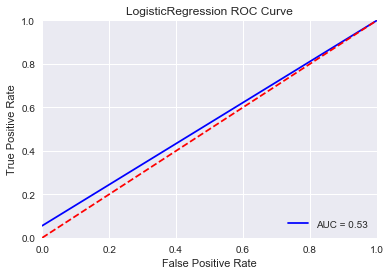

In [80]:
columns = ['Age','Op_Year', 'Pos_Nodes', 'Survival']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                 header=None,
                 names = columns)
mid = df['Survival']
df.drop(labels=['Survival'], axis=1,inplace = True)
df.insert(0, 'Survival', mid)
df['Survival'].replace(1,0, inplace=True)
df['Survival'].replace(2,1, inplace=True)

y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)
lr = LogisticRegression()
lr.fit(X_train, y_train)

print_AUC(lr, y_test, X_test, 'LogisticRegression')